## Amazon UK Products Dataset 2023 (2.2M Products) [Cont.]

### Classification with Oversampling

Source: Kaggle.com (https://www.kaggle.com/datasets/asaniczka/amazon-uk-products-dataset-2023)

This dataset contains details of sales for 2.2 million products, with ten columns from Product ID to Product Category. In this section, we attempt to use stars, reviews, price, boughtInLastMonth to predict whether the prodct is the best seller in the last month. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("amz_uk.csv")

In [8]:
x=df[['stars', 'reviews', 'price', 'boughtInLastMonth']]
y=df['isBestSeller']

y=y.replace({False:0,True:1})

In [9]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(sampling_strategy='not majority')
x,y=ros.fit_resample(x,y)

<AxesSubplot:ylabel='isBestSeller'>

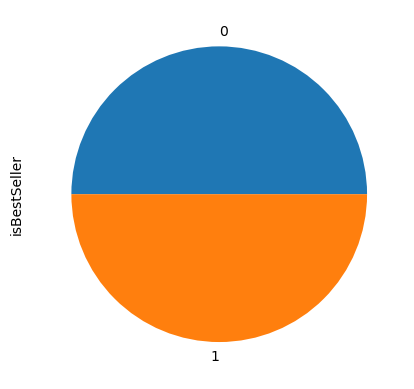

In [10]:
y.value_counts()
y.value_counts().plot.pie()


In [11]:
from sklearn.model_selection import train_test_split as split
x_train,x_test,y_train,y_test=split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### Logistic Regression 

First, let's try logistic regression first for its simplicity. 

In [14]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train, y_train)

y_pred=lg.predict(x_test)

0.8270951516313481

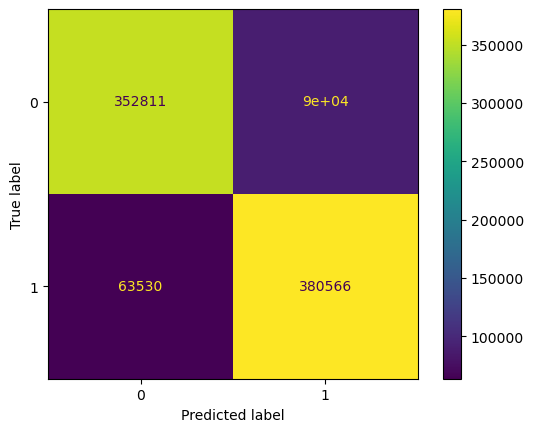

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
accuracy_score(y_test,y_pred)

### Random Forest Classification 

Let's try Random Forest Classification now. 

In [16]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=100, min_samples_split=2, criterion='entropy')
random.fit(x_train,y_train)

y_pred_rf=random.predict(x_test)

0.9983771103767946

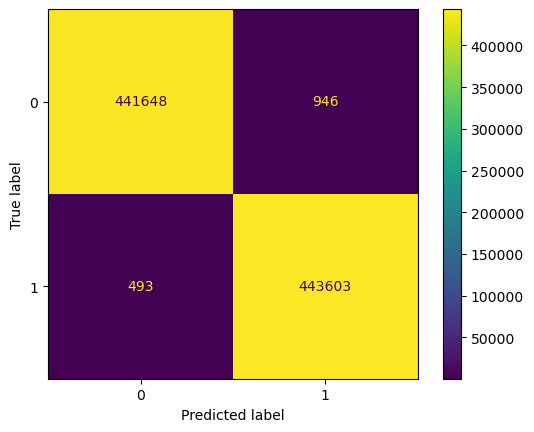

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)
accuracy_score(y_test,y_pred_rf)

As expected, Random Forest Classification has predicted the dependent variable with over 99% accuracy. 